In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [83]:
def f(x):
    return np.cos(x) - x

def f_prime(x):
    return -np.sin(x) - 1

def bisection(f,a,b,eps = 10**-14, r = None, t = 20):
    if f(a)*f(b)>=0:
        print('agh!')
        return
    
    xs = np.zeros((t,1))
    error = np.zeros((t,1))
    for i in range(t):
        x = (a+b)/2
        xs[i] = x
        error[i] = abs(xs[i] - r)
        #print(x)
        if f(x)*f(a)>0:
            a = x
            b = b
        else:
            b = x
            a = a
            
    return x,xs,error

def fixpoint_y(x):
    return np.cos(x)-x+x

def newton_z(z, z_prime, x0, r = None, t = 20):
    xs = np.zeros((t,1))
    error = np.zeros((t,1))
    for i in range(t):
        
        x1 = x0 - z(x0)/z_prime(x0)
        x0 = x1
        
        xs[i] = x0
        error[i] = abs(xs[i] - r)
    return xs, error

In [5]:
# parameters
r = 0.7390851332151607 # root

In [72]:
# bisection
x, xs, error_bi = bisection(f = f, a = 0.0, b = 1.0, eps = 10**-14, r = r, t = 50)

In [69]:
def fixpoint_y2(x,mu):
    return 4*mu*(4*mu*x - 4*mu*x**2)*(1-4*mu*x+4*mu*x**2)

from matplotlib import cm
# fixed point iteration
mus = np.linspace(0.001, 1, 100)
all_x0 = np.linspace(0, 3, 50)
all_x = np.zeros((100,50))
for idx, mu in enumerate(mus):
    for idx_x0, x0 in enumerate(all_x0):
        for i in range(50): # 50 iterations
            x1 = fixpoint_y2(x0,mu)
            x0 = x1
        all_x[idx, idx_x0] = x1
    

<ipython-input-69-94024ee97a83>:2: RuntimeWarning: overflow encountered in double_scalars
  return 4*mu*(4*mu*x - 4*mu*x**2)*(1-4*mu*x+4*mu*x**2)


Text(0.5, 1.0, 'g(g(z)) as a function of $\\mu$')

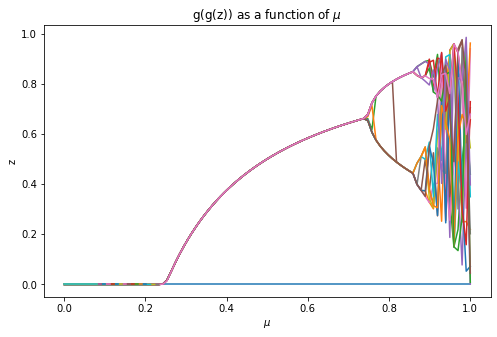

In [70]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(mus, all_x)
ax.set_xlabel(r'$\mu$')
ax.set_ylabel('z')
ax.set_title(r"g(g(z)) as a function of $\mu$")

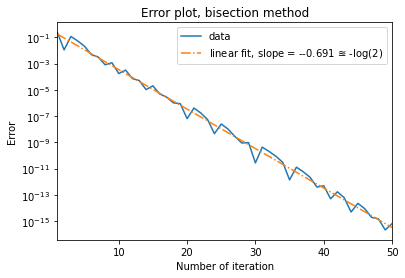

In [33]:
fig, ax = plt.subplots()
ax.semilogy(list(range(1,51)), error_bi, label = 'data')
ax.set_title('Error plot, bisection method')
ax.set_xlabel('Number of iteration')
ax.set_ylabel('Error')
ax.set_xlim(left = 1, right = 50)

z = np.polyfit(list(range(1,51)), np.log(error_bi), 1)
# add the linear fit to the plot
ax.semilogy(list(range(1,51)), np.exp(z[0]*list(range(1,51)) + z[1]), '-.',label=r'linear fit, slope = -{:.3f} $\approxeq$ -log(2)'.format(z[0][0]))
ax.legend()

Mean Lipschitz constant is 0.67
Bisection is faster since its error upper bound is halved every iteration, where as according to the Lipschitz constant I derived from fixed point method, the error decay rate is more than half, meaning slower. 


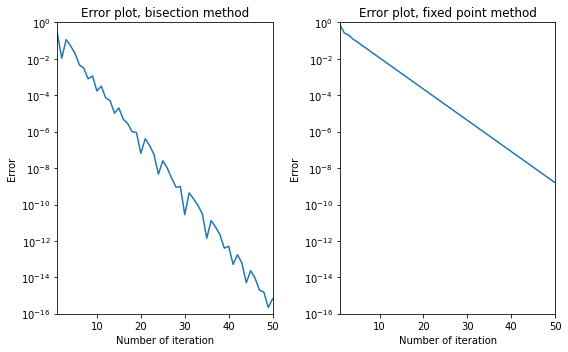

In [81]:
# fixed point iteration
x0 = 0
xs = np.zeros((50,1))
error_fp = np.zeros((50,1))
for i in range(50):
    xs[i] = x0
    error_fp[i] = abs(xs[i] - r)
    x1 = fixpoint_y(x0)
    x0 = x1

fig, axes = plt.subplots(1,2, figsize = (8,5))
axes[0].semilogy(list(range(1,51)), error_bi, label = 'data')
axes[0].set_title('Error plot, bisection method')
axes[0].set_xlabel('Number of iteration')
axes[0].set_ylabel('Error')
axes[0].set_ylim(bottom = 10**-16, top = 1)
axes[0].set_xlim(left = 1, right = 50)

axes[1].semilogy(list(range(1,51)), error_fp)
axes[1].set_title('Error plot, fixed point method')
axes[1].set_xlabel('Number of iteration')
axes[1].set_ylabel('Error')
axes[1].set_ylim(bottom = 10**-16, top = 1)
axes[1].set_xlim(left = 1, right = 50)
fig.tight_layout()

# estimate Lipschitz constant
error_left = error_fp[0:-1]
error_right = error_fp[1::]
Ls = error_right/error_left
print('Mean Lipschitz constant is {:.2f}'.format(np.mean(Ls)))
print('Bisection is faster since its error upper bound is halved every iteration, where as according to the Lipschitz constant I derived from fixed point method, the error decay rate is more than half, meaning slower. ')

Newton's method is the fastest, since it has quadratic order of convergence. The other two are linear convergence.


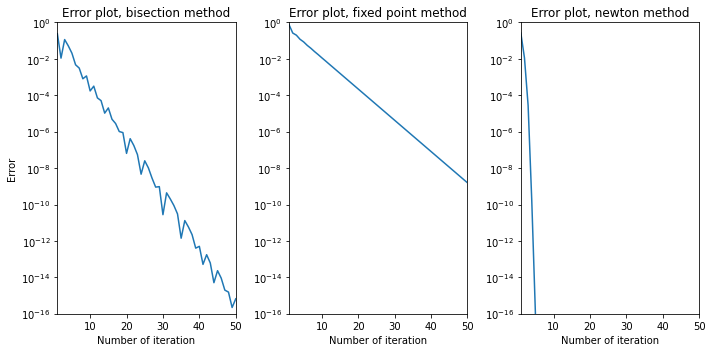

In [85]:
# newton's method
xs_newton, error_newton = newton_z(z = f, z_prime = f_prime, x0 = 0, r = r, t = 50)

# three plots together

fig, axes = plt.subplots(1, 3, figsize = (10,5))
axes[0].semilogy(list(range(1,51)), error_bi)
axes[0].set_title('Error plot, bisection method')
axes[0].set_xlabel('Number of iteration')
axes[0].set_ylabel('Error')
axes[0].set_ylim(bottom = 10**-16, top = 1)
axes[0].set_xlim(left = 1, right = 50)

axes[1].semilogy(list(range(1,51)), error_fp)
axes[1].set_title('Error plot, fixed point method')
axes[1].set_xlabel('Number of iteration')
axes[1].set_ylim(bottom = 10**-16, top = 1)
axes[1].set_xlim(left = 1, right = 50)

axes[2].semilogy(list(range(1,51)), error_newton)
axes[2].set_title('Error plot, newton method')
axes[2].set_xlabel('Number of iteration')
axes[2].set_ylim(bottom = 10**-16, top = 1)
axes[2].set_xlim(left = 1, right = 50)
fig.tight_layout()

print("Newton's method is the fastest, since it has quadratic order of convergence. The other two are linear convergence.")